# 01.01 - PROYECTO KAGGLE

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


## download data directly from Kaggle

- create a file `kaggle.json` with your authentication token (in kaggle $\to$ click user icon on top-right $\to$ settings $\to$ API create new token)
- upload it to this notebook workspace
- run the following cell

In [9]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

 84% 17.0M/20.1M [00:00<00:00, 27.6MB/s]
100% 20.1M/20.1M [00:00<00:00, 27.4MB/s]


## unzip and inspect data

In [10]:
!unzip udea*.zip > /dev/null

In [11]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  50135751 test.csv
   692501  10666231 118025055 train.csv
  1286075  15528571 172877479 total


## load `train.csv` data with pandas



In [12]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)


shape of loaded dataframe (692500, 12)


In [14]:
z.head()


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


<Axes: xlabel='RENDIMIENTO_GLOBAL'>

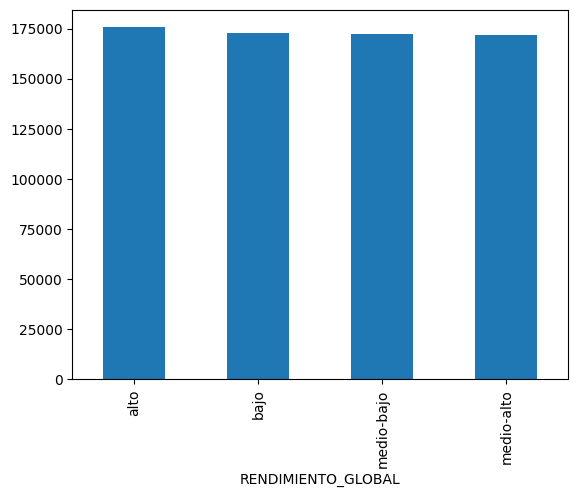

In [17]:
import matplotlib.pyplot as plt

z.RENDIMIENTO_GLOBAL.value_counts().plot(kind='bar')

<Axes: >

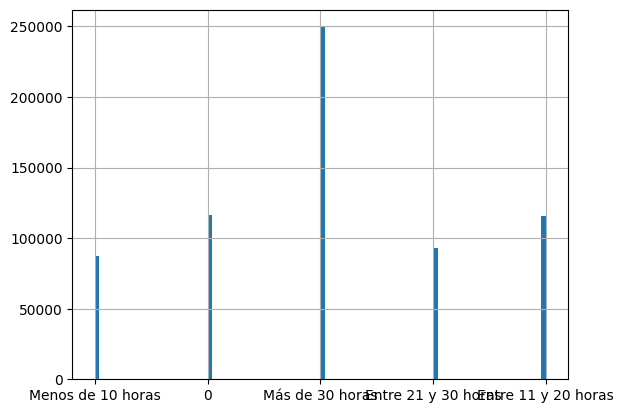

In [21]:
z.ESTU_HORASSEMANATRABAJA.hist(bins=100)

,ESTU_HORASSEMANATRABAJA
RENDIMIENTO_GLOBAL,
alto,"Axes(0.125,0.11;0.775x0.77)"
bajo,"Axes(0.125,0.11;0.775x0.77)"
medio-alto,"Axes(0.125,0.11;0.775x0.77)"
medio-bajo,"Axes(0.125,0.11;0.775x0.77)"


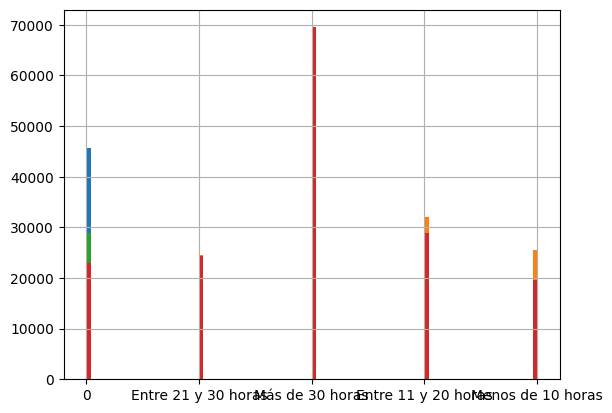

In [24]:
z.groupby("RENDIMIENTO_GLOBAL").ESTU_HORASSEMANATRABAJA.hist(bins=100)


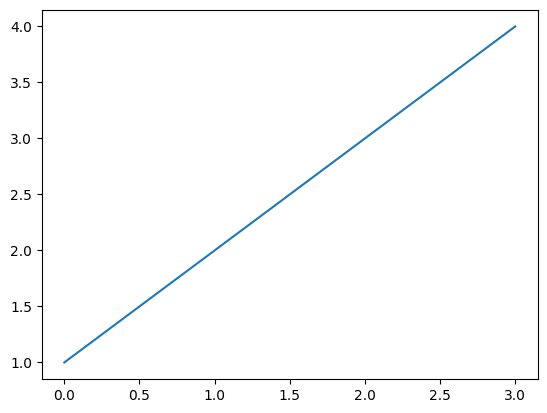

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])


<Axes: xlabel='ESTU_PRGM_ACADEMICO'>

<IPython.core.display.Javascript object>

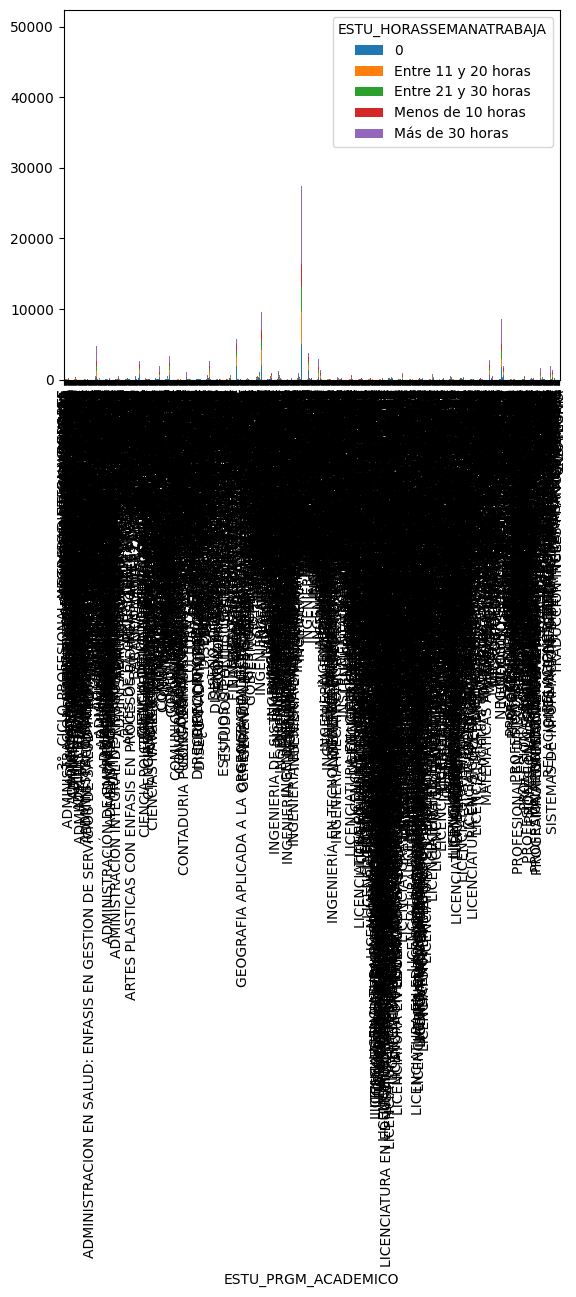

In [60]:
# prompt: Deseamos ver que numero de estudiantes por programa academico trabajaron y cuales no.
%matplotlib inline
z.groupby(['ESTU_PRGM_ACADEMICO', 'ESTU_HORASSEMANATRABAJA']).size().unstack().fillna(0).plot(kind='bar', stacked=True)


In [50]:
z.ESTU_HORASSEMANATRABAJA.isna().sum(), z.ESTU_HORASSEMANATRABAJA.count()
z_prueba=z.dropna(subset=["ESTU_HORASSEMANATRABAJA"])
z_prueba.ESTU_HORASSEMANATRABAJA.isna().sum(), z_prueba.ESTU_HORASSEMANATRABAJA.count()


(0, 661643)

In [56]:
# prompt: Deseamos ver que numero de estudiantes por programa academico trabajaron y cuales no en un grafica.

trabajan = z.groupby('ESTU_PRGM_ACADEMICO')['ESTU_HORASSEMANATRABAJA'].apply(lambda x: x.notna().sum())
no_trabajan = z.groupby('ESTU_PRGM_ACADEMICO')['ESTU_HORASSEMANATRABAJA'].apply(lambda x: x.isna().sum())

df = pd.DataFrame({'Trabajan': trabajan, 'No Trabajan': no_trabajan})

df.plot(kind='bar', figsize=(10, 6))
plt.title('Número de Estudiantes que Trabajan y No Trabajan por Programa Académico')
plt.xlabel('Programa Académico')
plt.ylabel('Número de Estudiantes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


TypeError: no numeric data to plot

In [54]:
# prompt: Deseamos ver que numero de estudiantes por programa academico trabajaron y cuales no en un grafica. Hazlo para los 10 programas con más personas.

top_10_programas = z['ESTU_PRGM_ACADEMICO'].value_counts().nlargest(10).index
top_10_programas
trabajan = z[z['ESTU_HORASSEMANATRABAJA'] != "0"].groupby('ESTU_PRGM_ACADEMICO')['ESTU_CONSECUTIVO'].count()
no_trabajan = z[z['ESTU_HORASSEMANATRABAJA'] == "0"].groupby('ESTU_PRGM_ACADEMICO')['ESTU_CONSECUTIVO'].count()

df_grafico = pd.DataFrame({'Trabajan': trabajan, 'No Trabajan': no_trabajan})
df_grafico = df_grafico.loc[top_10_programas]
df_grafico.plot(kind='bar', figsize=(10, 6))
plt.title('Número de Estudiantes que Trabajan y No Trabajan por Programa Académico (Top 10)')
plt.xlabel('Programa Académico')
plt.ylabel('Número de Estudiantes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Index(['DERECHO', 'ADMINISTRACION DE EMPRESAS', 'CONTADURIA PUBLICA',
       'PSICOLOGIA', 'INGENIERIA INDUSTRIAL', 'ADMINISTRACIÓN DE EMPRESAS',
       'INGENIERIA CIVIL', 'MEDICINA', 'PSICOLOGÍA', 'INGENIERIA DE SISTEMAS'],
      dtype='object', name='ESTU_PRGM_ACADEMICO')

<Axes: xlabel='FAMI_EDUCACIONMADRE'>

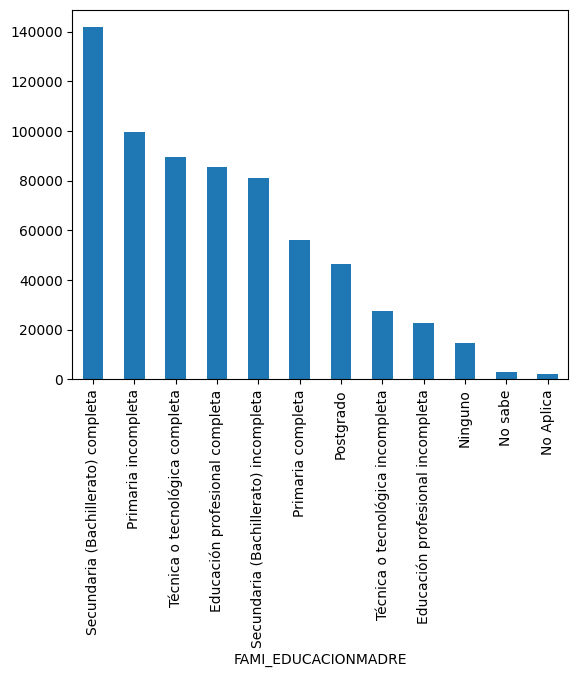

In [ ]:
z.FAMI_EDUCACIONMADRE.value_counts().plot(kind='bar')

<Axes: xlabel='ESTU_VALORMATRICULAUNIVERSIDAD'>

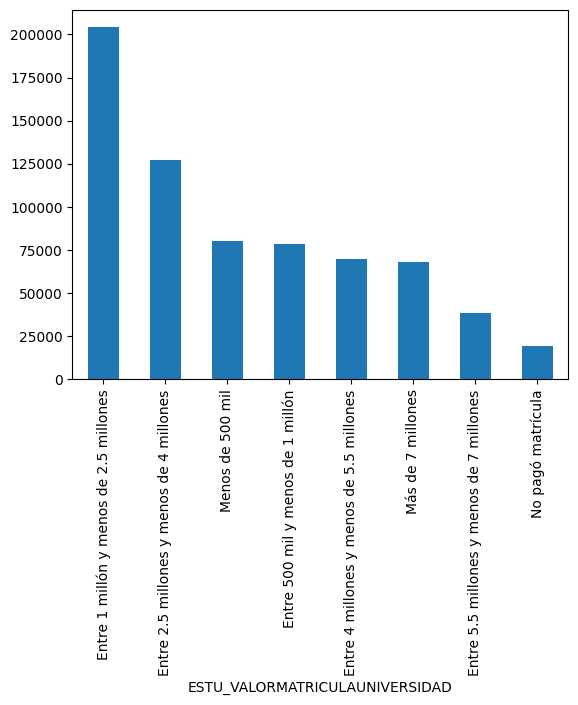

In [ ]:
z.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts().plot(kind='bar')

### Visualización de Rendimiento global respecto a las horas trabajadas.

0
Entre 11 y 20 horas
Entre 21 y 30 horas
Menos de 10 horas
Más de 30 horas


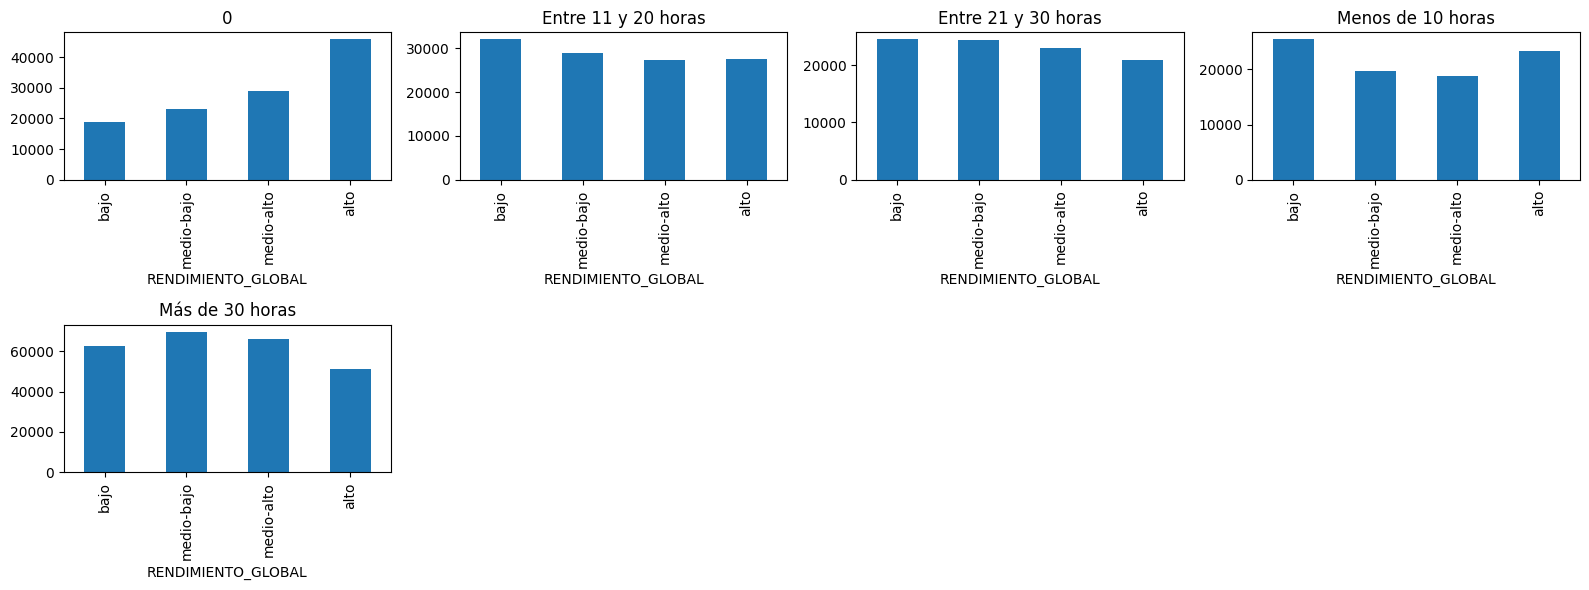

In [26]:
from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(z.ESTU_HORASSEMANATRABAJA.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    print(ci)
    zc = z[z.ESTU_HORASSEMANATRABAJA==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

### Visualización de Rendimiento global respecto a las horas trabajadas y los que pagaron o no la matricula propia.

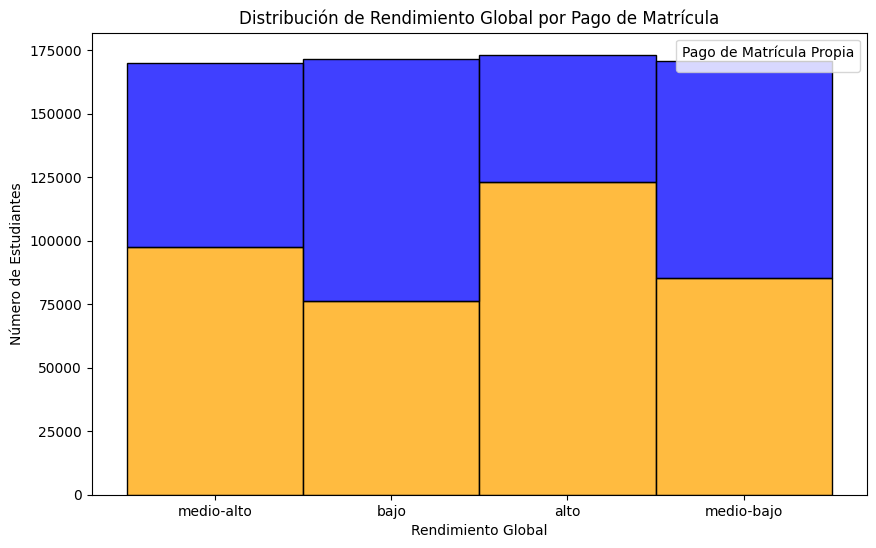

In [34]:
# prompt: Deseamos hacer un histograma donde podamos apreciar que porcentaje de estudiantes por cada rendimiento global pago su propia matricula o no. Ademas deseamos que se vean los nombres de los colores por el cual se esta agrupando

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=z, x='RENDIMIENTO_GLOBAL', hue='ESTU_PAGOMATRICULAPROPIO', multiple='stack',
             hue_order=['Si', 'No'], palette={'Si': 'blue', 'No': 'orange'})
plt.xlabel('Rendimiento Global')
plt.ylabel('Número de Estudiantes')
plt.title('Distribución de Rendimiento Global por Pago de Matrícula')
plt.legend(title='Pago de Matrícula Propia')
plt.show()


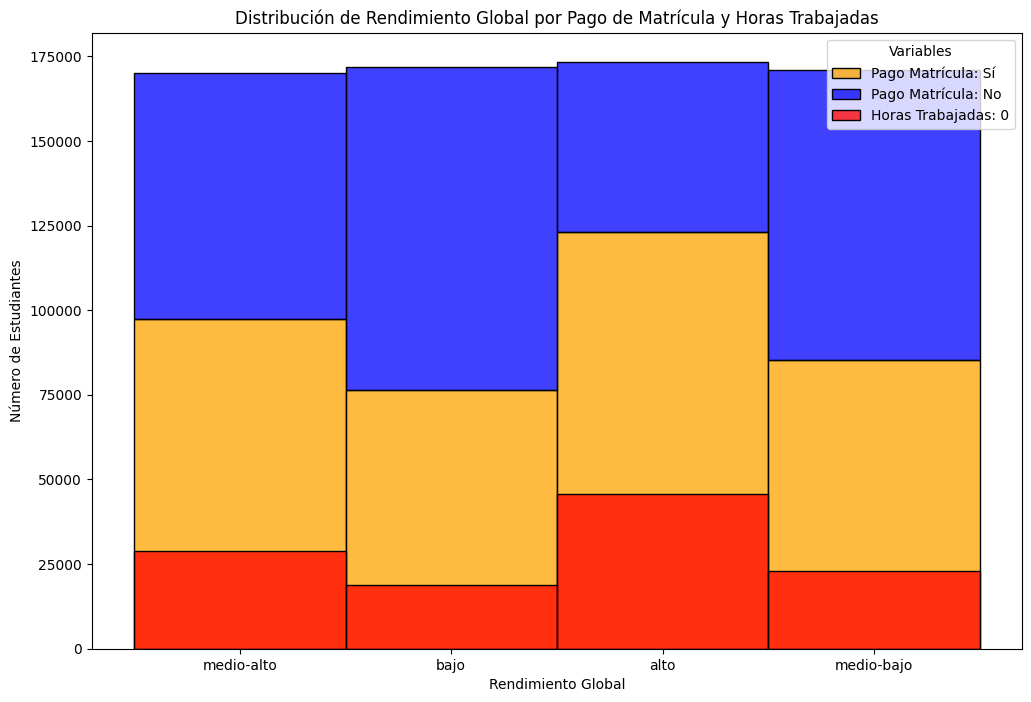

In [35]:
# prompt: Deseamos hacer un histograma donde podamos apreciar que porcentaje de estudiantes por cada rendimiento global pago su propia matricula o no y si trabajaron o no. Ademas deseamos que se vean los nombres de los colores por el cual se esta agrupando

plt.figure(figsize=(12, 8))
sns.histplot(data=z, x='RENDIMIENTO_GLOBAL', hue='ESTU_PAGOMATRICULAPROPIO', multiple='stack',
             hue_order=['Si', 'No'], palette={'Si': 'blue', 'No': 'orange'})

sns.histplot(data=z, x='RENDIMIENTO_GLOBAL', hue='ESTU_HORASSEMANATRABAJA', multiple='stack',
             hue_order=['0', '1-10', '11-20', '21-30', '31-40', 'Mas de 40'],
             palette={'0': 'red', '1-10': 'green', '11-20': 'purple', '21-30': 'yellow', '31-40': 'cyan', 'Mas de 40': 'magenta'})

plt.xlabel('Rendimiento Global')
plt.ylabel('Número de Estudiantes')
plt.title('Distribución de Rendimiento Global por Pago de Matrícula y Horas Trabajadas')
plt.legend(title='Variables', labels=['Pago Matrícula: Sí', 'Pago Matrícula: No',
                                       'Horas Trabajadas: 0', 'Horas Trabajadas: 1-10',
                                       'Horas Trabajadas: 11-20', 'Horas Trabajadas: 21-30',
                                       'Horas Trabajadas: 31-40', 'Horas Trabajadas: Más de 40'])
plt.show()


0
Entre 11 y 20 horas
Entre 21 y 30 horas
Menos de 10 horas
Más de 30 horas


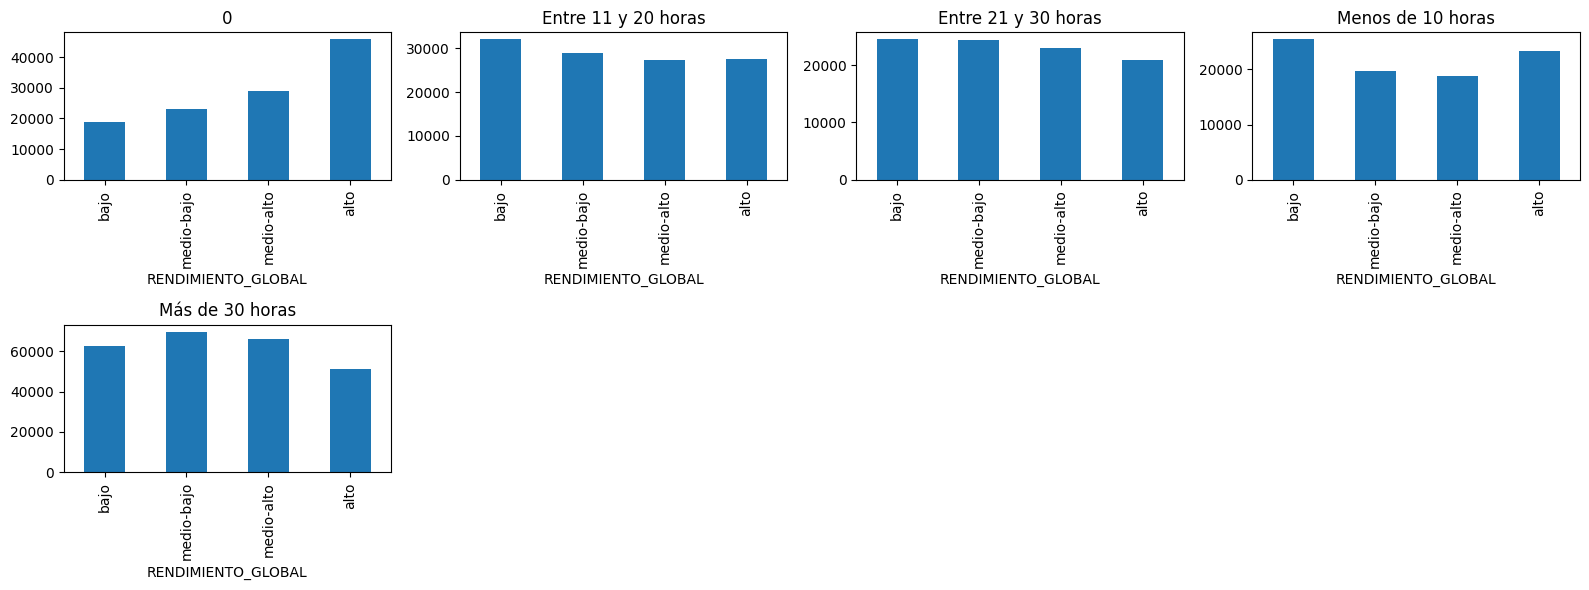

In [30]:
from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(z.ESTU_HORASSEMANATRABAJA.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    print(ci)
    zc = z[z.ESTU_HORASSEMANATRABAJA==ci]
    zc.groupby("RENDIMIENTO_GLOBAL").RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

### Visualización de Rendimiento global respecto si tienen internet o no.

No
Si


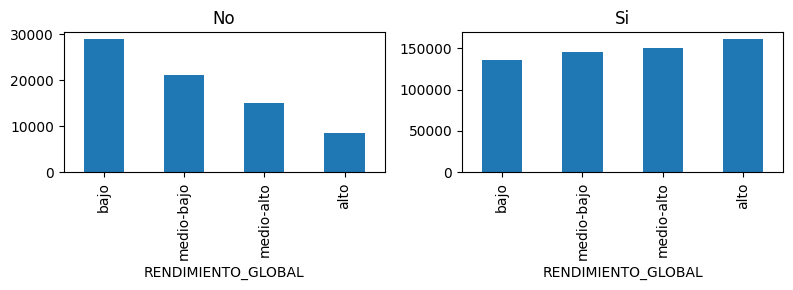

In [28]:
from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(z.FAMI_TIENEINTERNET.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    print(ci)
    zc = z[z.FAMI_TIENEINTERNET==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

### A

No
Si


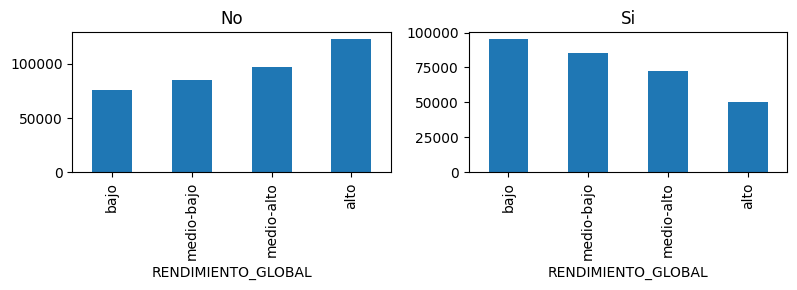

In [29]:
from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(z.ESTU_PAGOMATRICULAPROPIO.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    print(ci)
    zc = z[z.ESTU_PAGOMATRICULAPROPIO==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

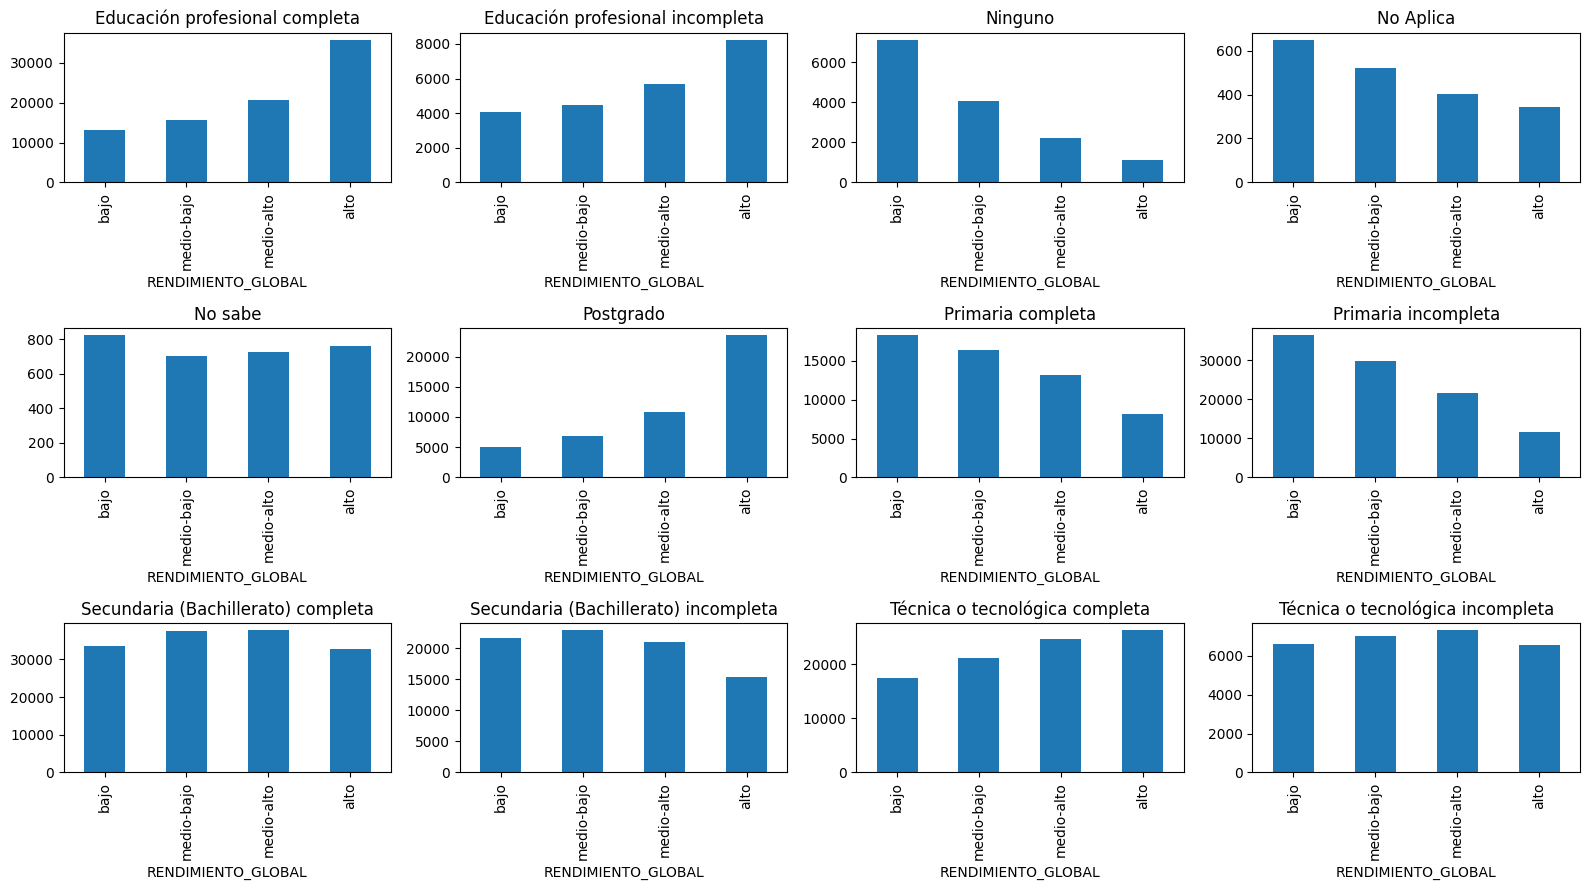

In [ ]:
c = sorted(z.FAMI_EDUCACIONMADRE.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.FAMI_EDUCACIONMADRE==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

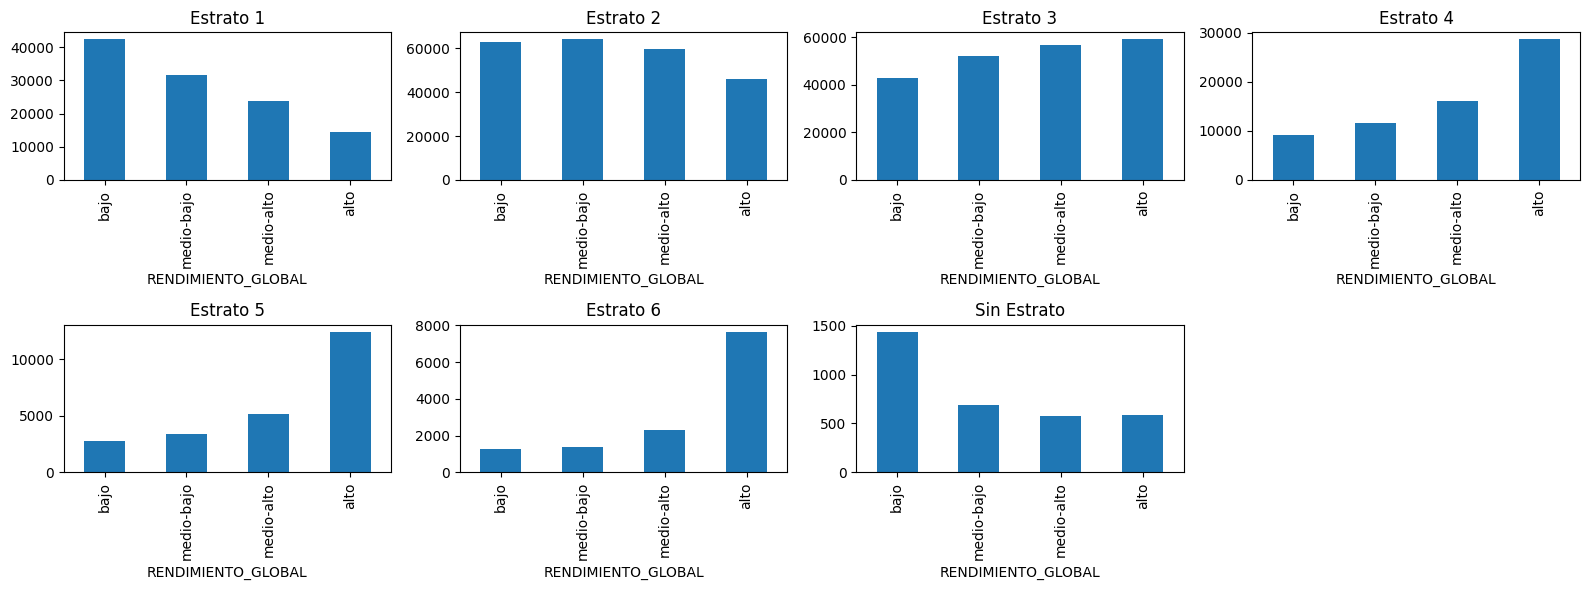

In [62]:
c = sorted(z.FAMI_ESTRATOVIVIENDA.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.FAMI_ESTRATOVIVIENDA==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

In [71]:
x, y=z.shape
print(x, y)

692500 12


In [63]:
z.FAMI_ESTRATOVIVIENDA.isna().sum()

32137

In [74]:
(z.FAMI_ESTRATOVIVIENDA.isna().sum()/x)*100

4.6407220216606495

In [65]:
z.FAMI_ESTRATOVIVIENDA[z.FAMI_ESTRATOVIVIENDA== "Sin Estrato"].count()

3289

Departamento

In [ ]:
# prompt: Como ordenar z.ESTU_PRGM_DEPARTAMENTO.unique() alfabeticamente

sorted(z.ESTU_PRGM_DEPARTAMENTO.unique())


In [87]:
sorted(z.ESTU_PRGM_DEPARTAMENTO.unique()), len(z.ESTU_PRGM_DEPARTAMENTO.unique())

(['AMAZONAS',
  'ANTIOQUIA',
  'ARAUCA',
  'ATLANTICO',
  'BOGOTÁ',
  'BOLIVAR',
  'BOYACA',
  'CALDAS',
  'CAQUETA',
  'CASANARE',
  'CAUCA',
  'CESAR',
  'CHOCO',
  'CORDOBA',
  'CUNDINAMARCA',
  'GUAVIARE',
  'HUILA',
  'LA GUAJIRA',
  'MAGDALENA',
  'META',
  'NARIÑO',
  'NORTE SANTANDER',
  'PUTUMAYO',
  'QUINDIO',
  'RISARALDA',
  'SAN ANDRES',
  'SANTANDER',
  'SUCRE',
  'TOLIMA',
  'VALLE',
  'VAUPES'],
 31)

In [88]:
z[z.ESTU_PRGM_DEPARTAMENTO=="GUAVIARE"].RENDIMIENTO_GLOBAL.value_counts()

,count
RENDIMIENTO_GLOBAL,
bajo,19
medio-bajo,13
medio-alto,5


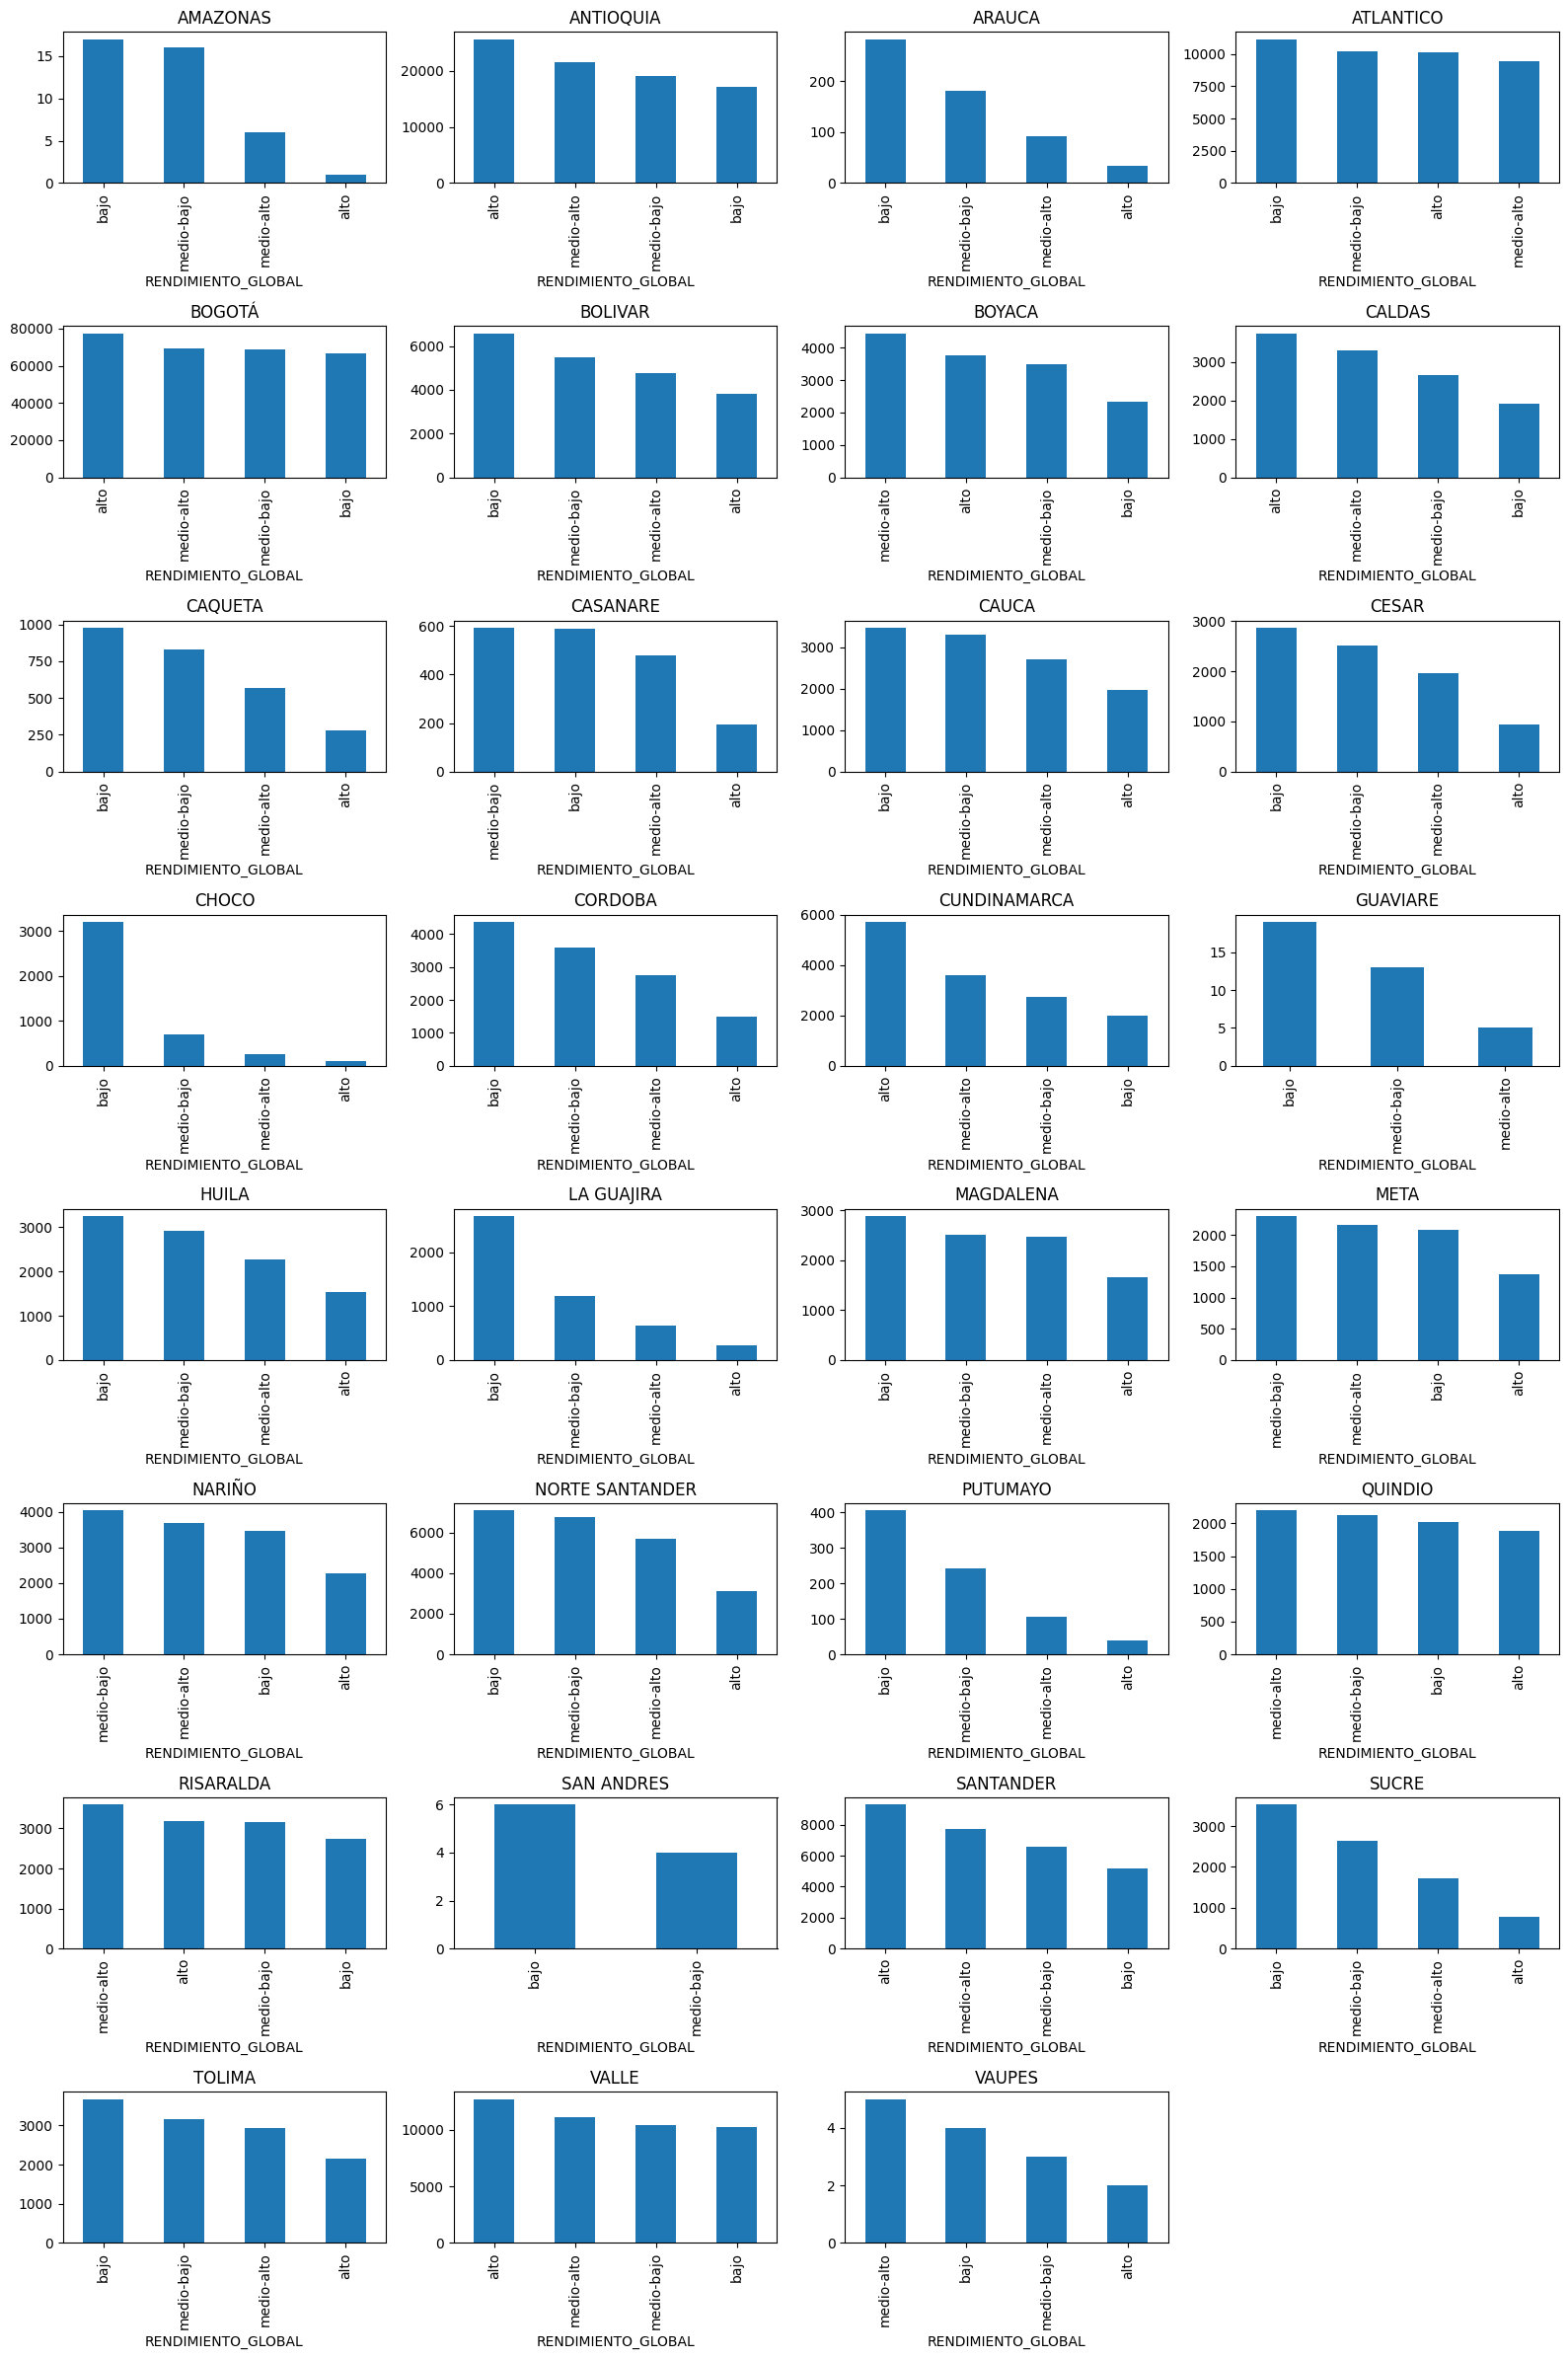

In [89]:
c = sorted(z.ESTU_PRGM_DEPARTAMENTO.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.ESTU_PRGM_DEPARTAMENTO==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts().plot(kind='bar')
    plt.title(ci)

In [90]:
z.ESTU_PRGM_DEPARTAMENTO.isna().sum()

0

In [91]:
z.RENDIMIENTO_GLOBAL.isna().sum()

0

In [80]:
z.PERIODO.describe()

,PERIODO
count,692500.000000
mean,20198.366679
std,10.535037
min,20183.000000
25%,20195.000000
50%,20195.000000
75%,20203.000000
max,20213.000000


In [81]:
z.PERIODO.unique()

array([20212, 20203, 20195, 20183, 20194, 20213, 20184, 20202, 20196])

In [ ]:
# prompt: Generar las estadisticas de la columna periodo

z.PERIODO.describe()
